<center>
<img src="./pict/scipy_logo.png">
<br />
<br />

# Introduction to image processing 

In [1]:
import imageio # библиотека для чтения и записи изображений

import numpy as np # знакомые библиотеки
import matplotlib.pyplot as plt

from scipy import ndimage # модуль для работы с изображениями в scipy

# OpenCV, SciKit-Image, Pillow - другие специализированные библиотеки для работы с изображениями

%matplotlib inline

Чтение данных

shape:  (512, 512, 3)
type:  <class 'imageio.core.util.Array'>


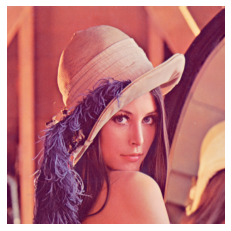

In [2]:
# https://en.wikipedia.org/wiki/Lenna

img = imageio.imread("./Lenna.png") # plt.imread, PIL.Image.open и т.д. imwrite() - запись

print('shape: ', img.shape) # 512x512 пикселей, 3-я размерность - цвет
print('type: ', type(img))

plt.imshow(img) # RGB scale
plt.axis('off')
plt.show()

Цветовое представление изображения 

In [3]:
img[:, :, 0] # каждый пиксель расположен на цветовом кубе со сторонами - 255

Array([[226, 226, 223, ..., 230, 221, 200],
       [226, 226, 223, ..., 230, 221, 200],
       [226, 226, 223, ..., 230, 221, 200],
       ...,
       [ 84,  84,  92, ..., 173, 172, 177],
       [ 82,  82,  96, ..., 179, 181, 185],
       [ 82,  82,  96, ..., 179, 181, 185]], dtype=uint8)

<center>
<img src="./pict/additive_color.png">
<br />
<br />

<center>
<img src="./pict/RGB_color_solid_cube.png">
<br />
<br />

In [4]:
# 0 - минимум интенсивности, 255 - максимум, для черно-белого изображения 0 - черный цвет, 255 - белый
# 255 - байтовая глубина

np.array(img).min(), np.array(img).max(), np.array(img).mean() # вариативность интенсивности

(3, 255, 128.22837575276694)

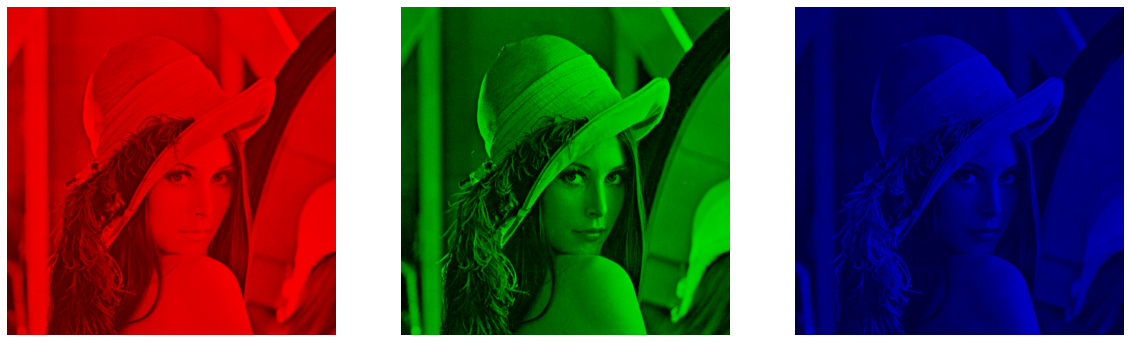

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

for c, ax in zip(range(3), axs):
    color_img = np.zeros_like(img)
    color_img[..., c] = img[..., c]
    ax.imshow(color_img)
    ax.set_axis_off()

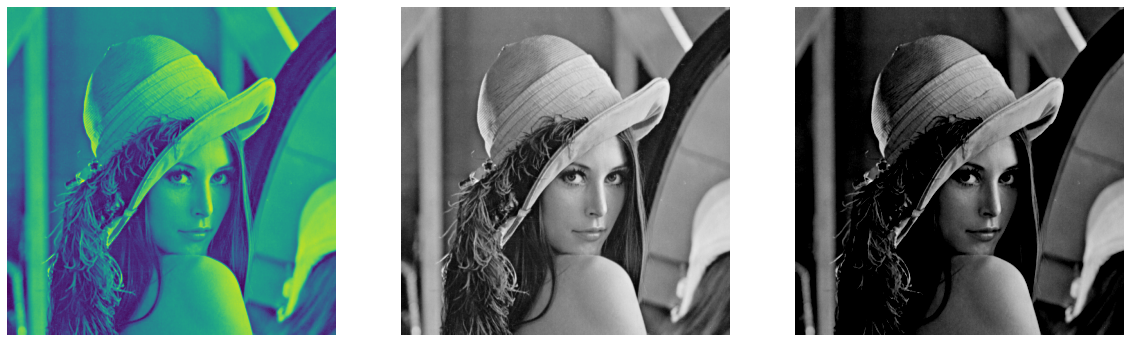

In [6]:
# grayscale = 0.2989 R + 0.5870 G + 0.1140 B - формула приведения

img_gray = np.dot(img, [0.2989, 0.5870, 0.1140])

plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(img_gray) 
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_gray, cmap=plt.cm.gray) 
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_gray, cmap=plt.cm.gray, vmin=100, vmax=250) # контрастность
plt.axis('off')
plt.show()

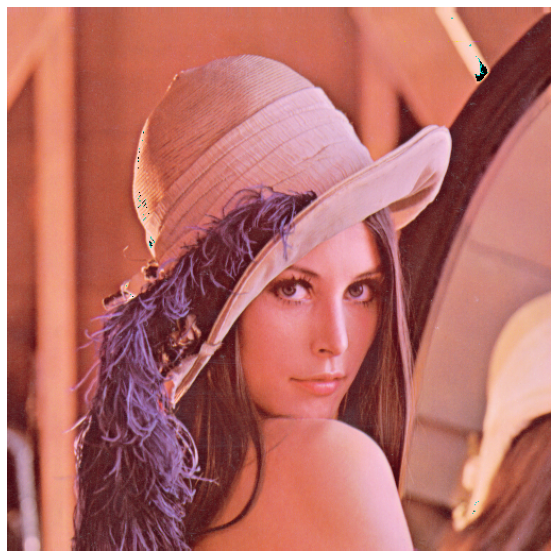

In [7]:
# https://www.degeneratestate.org/posts/2016/Oct/23/image-processing-with-numpy/
# вращение в пространстве цветов

from matplotlib.animation import FuncAnimation
from IPython import display
import warnings
warnings.filterwarnings("ignore")

def do_normalise(im):
    return -np.log(1 / ((1 + im) / 257) - 1)
 
def undo_normalise(im):
    return (1 + 1 / (np.exp(-im) + 1) * 257).astype("uint8")

def rotation_matrix(theta):
    """
    3D rotation matrix around the X-axis by angle theta
    """
    return np.c_[
        [1, 0, 0],
        [0, np.cos(theta), -np.sin(theta)],
        [0, np.sin(theta), np.cos(theta)]
    ]

for i in range(0, 20):
    im_normed = do_normalise(img)
    im_rotated = np.einsum("ijk, lk->ijl", im_normed, rotation_matrix(i * np.pi/10))
    im2 = undo_normalise(im_rotated)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(im2)
    plt.axis('off')
    plt.show()
    display.clear_output(wait=True)

Преобразования изображений

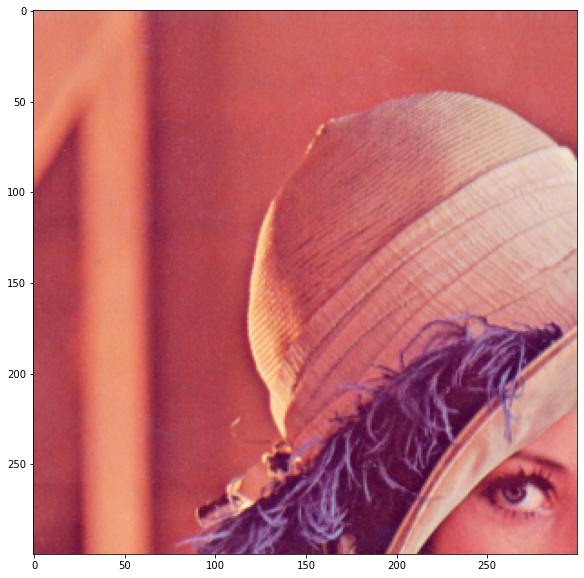

In [8]:
plt.figure(figsize=(10, 10))
plt.imshow(img[:300, :300, :]) # любые преобразования над матрицей - операции с изображением

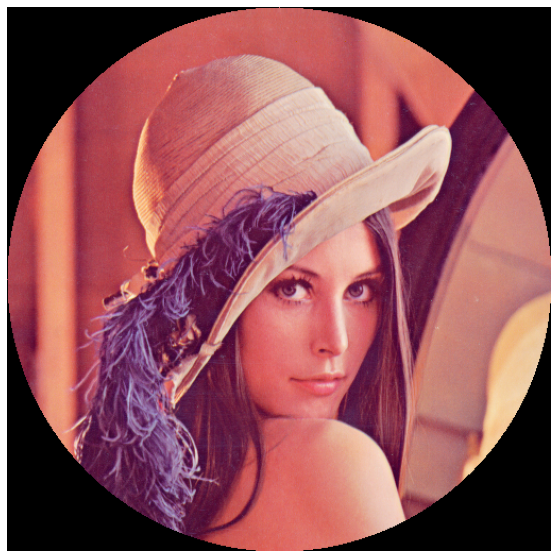

In [9]:
lx, ly, lz = img.shape

# Mask
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4 # задаем круг

img_circle = img.copy()
img_circle[mask] = 0 # обычная маска в numpy

plt.figure(figsize=(10, 10))
plt.imshow(img_circle)
plt.axis('off')
plt.show()

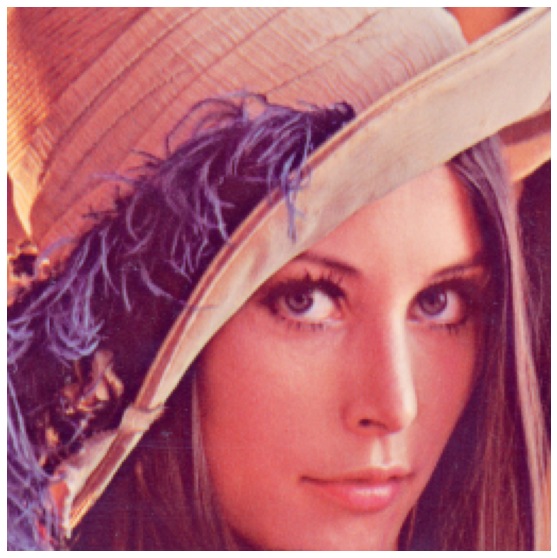

In [10]:
# Cropping
crop_img = img[lx // 4: - lx // 4, ly // 4: - ly // 4] # обычный slice в numpy

plt.figure(figsize=(10, 10))
plt.imshow(crop_img)
plt.axis('off')
plt.show()

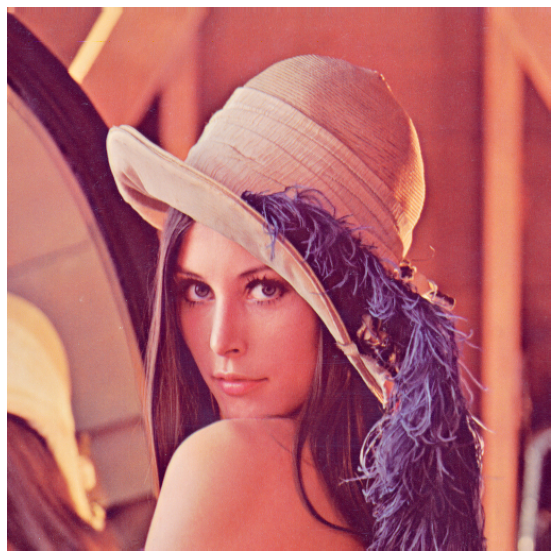

In [11]:
# Flip
flip_img = np.fliplr(img) # np.flipud up/down

plt.figure(figsize=(10, 10))
plt.imshow(flip_img)
plt.axis('off')
plt.show()

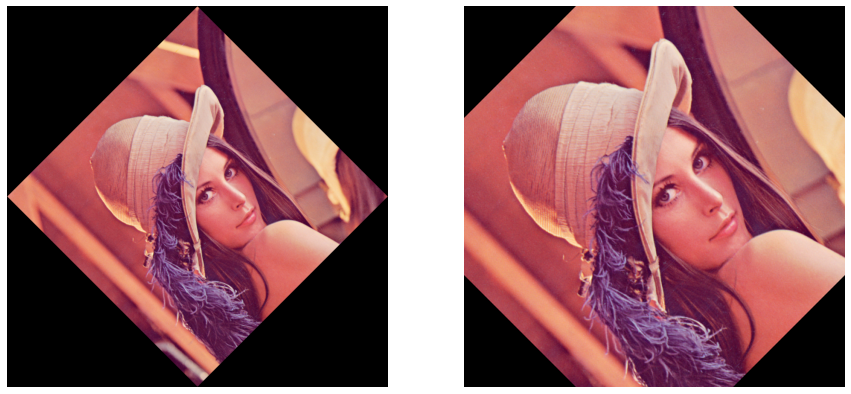

In [12]:
# Rotation
rotate_img = ndimage.rotate(img, 45)
rotate_img_noreshape = ndimage.rotate(img, 45, reshape=False)

plt.figure(figsize=(15, 15))

plt.subplot(1, 2, 1)
plt.imshow(rotate_img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rotate_img_noreshape)
plt.axis('off')

plt.show()

Сегментация

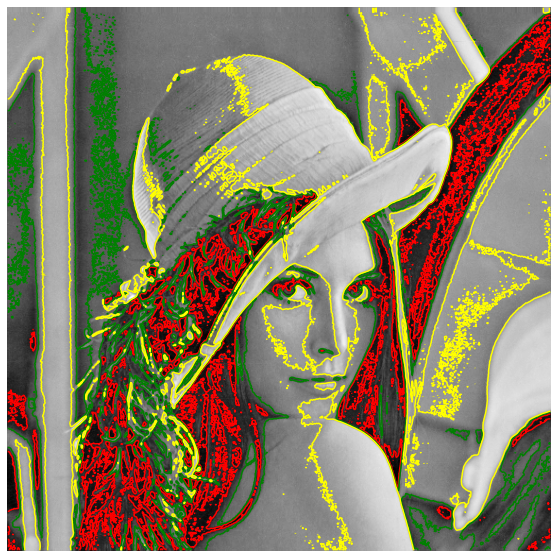

In [13]:
plt.figure(figsize=(10, 10))
plt.imshow(img_gray,  cmap=plt.cm.gray)
plt.contour(img_gray, levels=[50, 100, 150], 
            colors=['red', 'green', 'yellow']) # контуры - линии уровня
plt.axis('off')
plt.show()

<center>
<img src="https://scikit-image.org/docs/0.12.x/_static/img/logo.png">
<br />
<br />


In [14]:
from skimage import measure

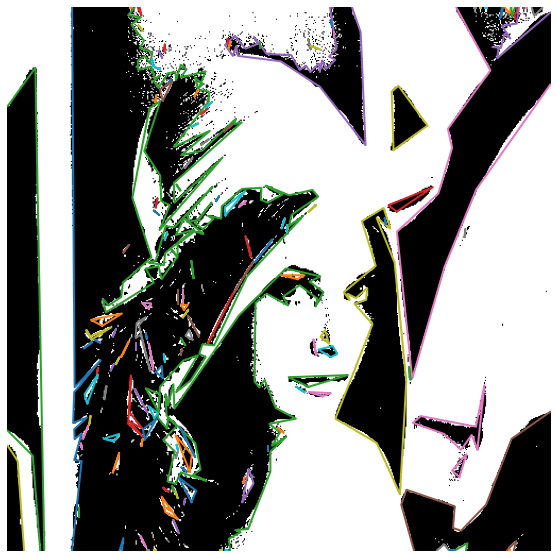

In [15]:
girl = img_gray > 1 * img_gray.mean()

contours = measure.find_contours(girl, 0.4)
simplified_contours = [measure.approximate_polygon(c, tolerance=5) for c in contours]

plt.figure(figsize=(20, 10))
plt.imshow(girl, plt.cm.gray)
for n, contour in enumerate(simplified_contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
    
plt.axis('off')
plt.show()

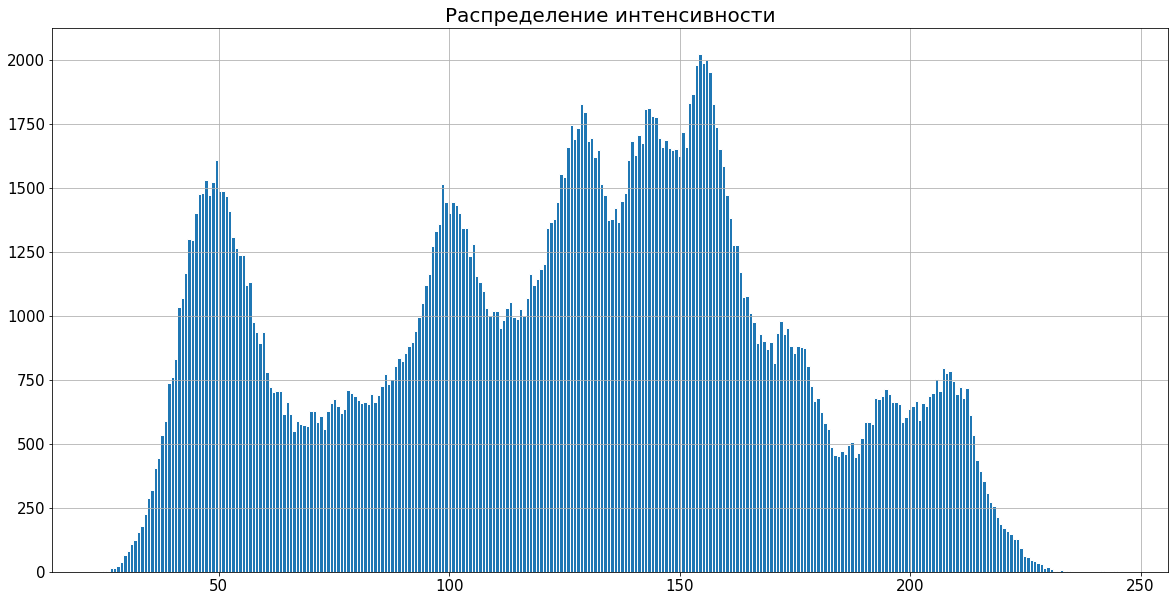

In [16]:
plt.figure(figsize=(20, 10))

plt.title('Распределение интенсивности', fontsize=20)
plt.hist(np.array(img_gray).ravel(), bins=300, edgecolor='white')

ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
    
plt.grid(True)
plt.show()

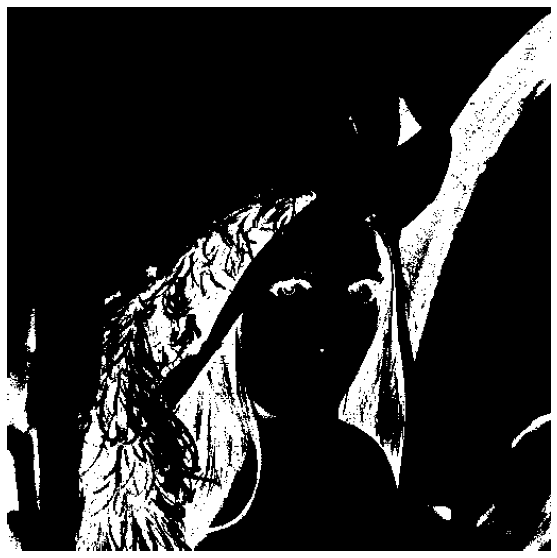

In [17]:
plt.figure(figsize=(10, 10))
plt.imshow(((img_gray < 60) * 255).astype("uint8"), plt.cm.gray)
plt.axis('off')
plt.show()

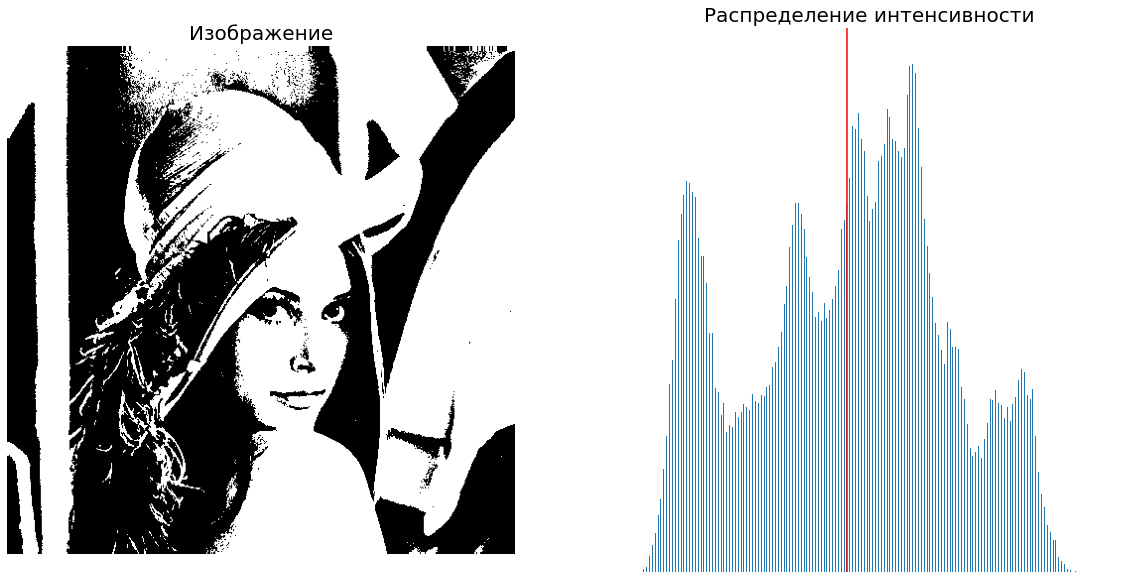

In [18]:
# сегментация

import time
from matplotlib.animation import FuncAnimation
from IPython import display
import warnings
warnings.filterwarnings("ignore")

for i in np.append(np.linspace(0, 2, 20), 1):
    
    plt.figure(figsize=(20,  10))
    plt.subplot(1, 2, 1)
    plt.title('Изображение', fontsize=20)
    plt.imshow(((img_gray > i * img_gray.mean()) * 255).astype("uint8"), 
               cmap=plt.cm.gray) # пороговая сегментация
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title('Распределение интенсивности', fontsize=20)
    plt.hist(np.array(img_gray).ravel(), bins=300, edgecolor='white')
    plt.axvline(x=i * img_gray.mean(), color='red')
    plt.axis('off')

    plt.show()
        
    display.clear_output(wait=True)
    time.sleep(0.5)

Порог Оцу: 116.45463203125


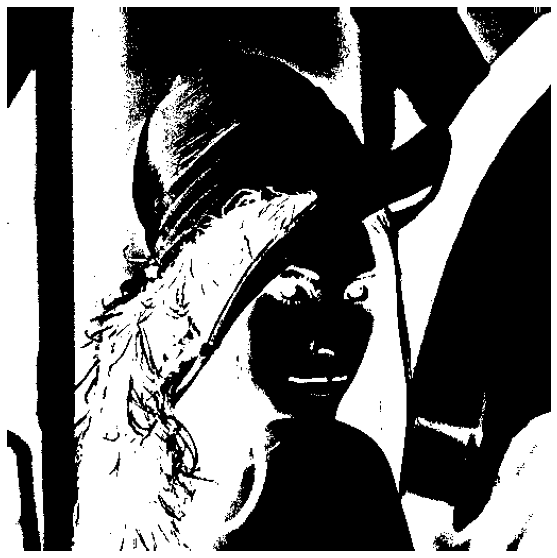

In [19]:
from skimage import filters

val = filters.threshold_otsu(img_gray) # основан на гистограмме
print('Порог Оцу:', val)

plt.figure(figsize=(10, 10))
plt.imshow(((img_gray < val) * 255).astype("uint8"), plt.cm.gray)
plt.axis('off')
plt.show()

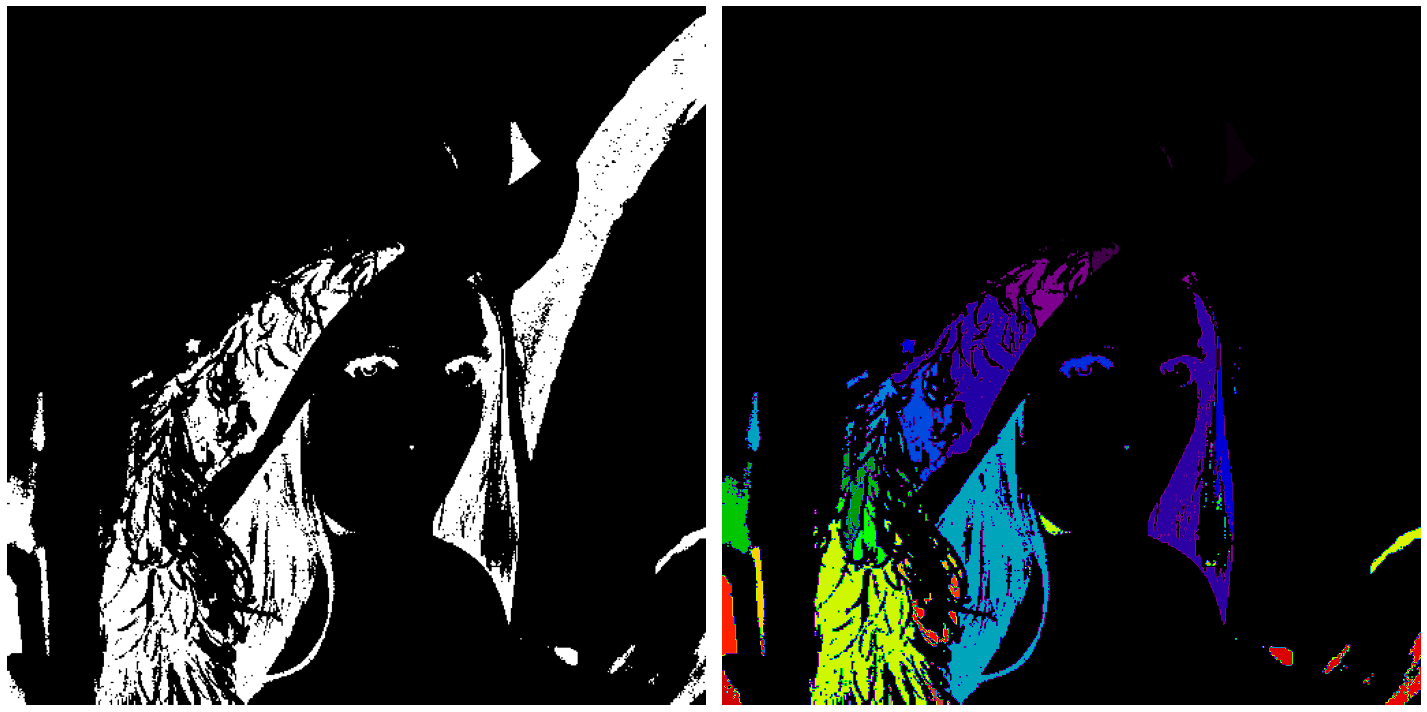

In [20]:
from skimage import measure 

girl = img_gray < 0.5 * img_gray.mean()
labels = measure.label(girl)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(girl, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(labels, cmap='nipy_spectral')
plt.axis('off')

plt.tight_layout()
plt.show()

Фильтры

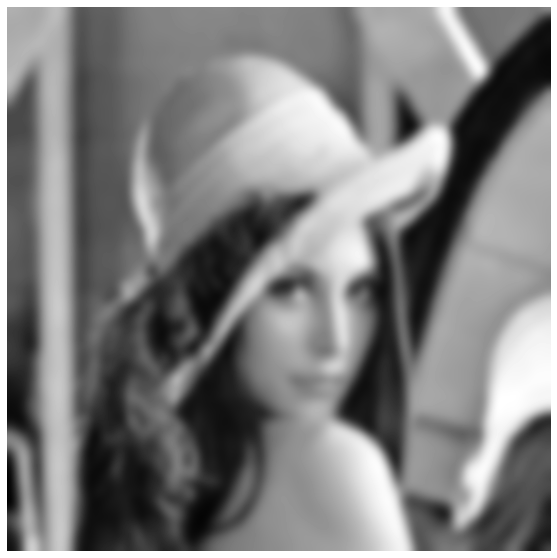

In [21]:
# https://docs.scipy.org/doc/scipy/reference/ndimage.html

gaussian_blurred = ndimage.gaussian_filter(img_gray, sigma=5) # размытие через фильтр Гаусса

plt.figure(figsize=(10, 10))
plt.imshow(gaussian_blurred,  plt.cm.gray)
plt.axis('off')
plt.show()

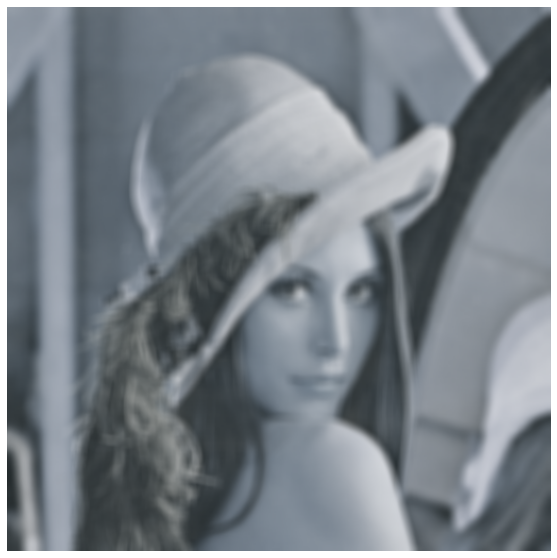

In [22]:
local_mean_blurred = ndimage.uniform_filter(img, size=10) # размытие через uniform фильтр

plt.figure(figsize=(10, 10))
plt.imshow(local_mean_blurred)
plt.axis('off')
plt.show()

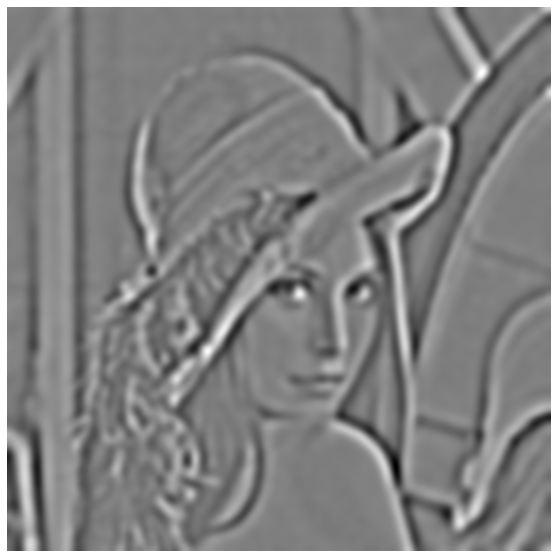

In [23]:
# комбинация фильтров

alpha = 1000000 # наведение резкости
filter_blurred = ndimage.gaussian_filter(gaussian_blurred, 1)
sharpened = gaussian_blurred + alpha * (gaussian_blurred - filter_blurred)  # придает больший вес контурам 


plt.figure(figsize=(10, 10))
plt.imshow(sharpened,  plt.cm.gray)
plt.axis('off')
plt.show()

Денойзинг

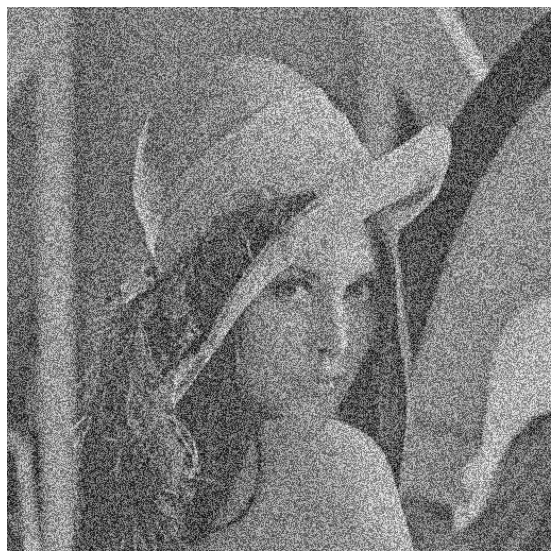

In [24]:
noisy = img_gray + 5 * img_gray.std() * np.random.random(img_gray.shape) # добавляем шум

plt.figure(figsize=(10, 10))
plt.imshow(noisy,  plt.cm.gray)
plt.axis('off')
plt.show()

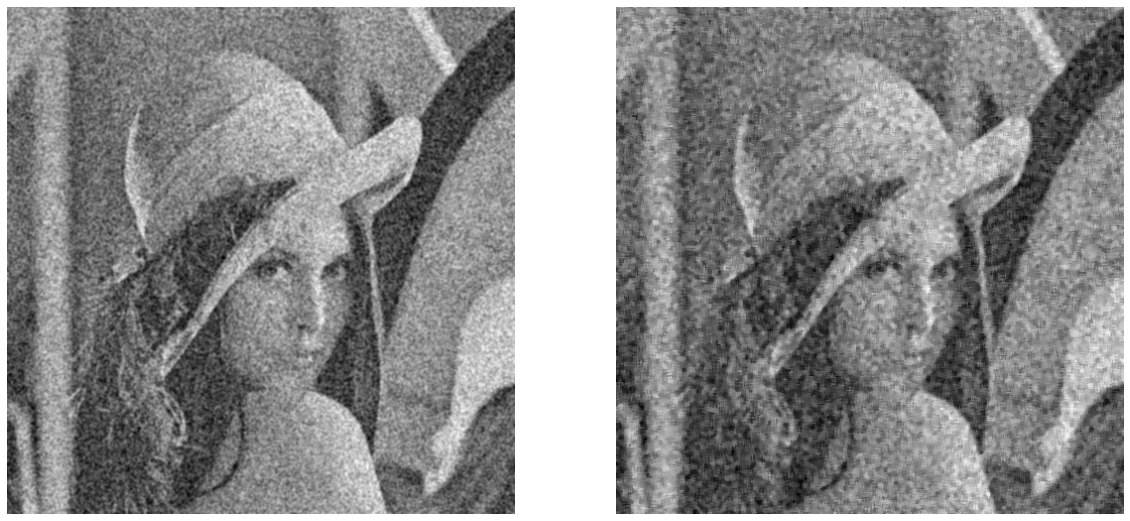

In [25]:
gauss_denoised = ndimage.gaussian_filter(noisy, 1)
med_denoised = ndimage.median_filter(noisy, 5) # вроде как должно лучше с границами..

plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(gauss_denoised,  plt.cm.gray)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(med_denoised,  plt.cm.gray)
plt.axis('off')

plt.show()

Edge detection problem

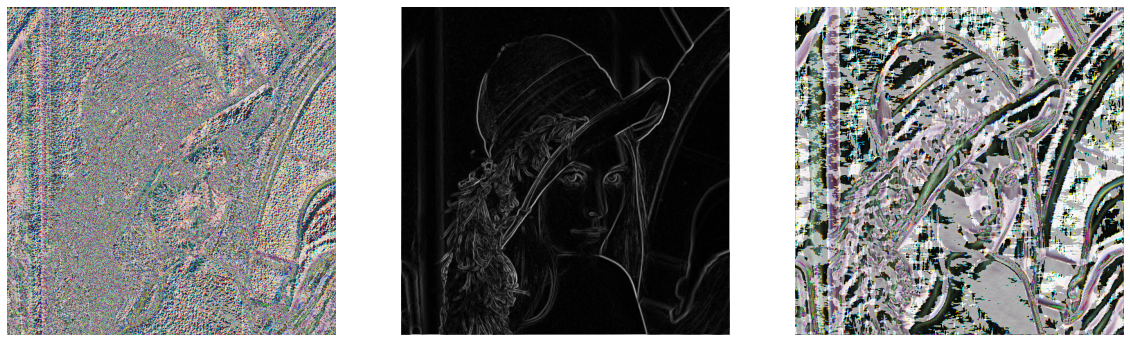

In [26]:
# edge detection 

def sobol_filter(img):     # фильтр Собель находит градиент по направлению по каждому цвету

    dx = ndimage.sobel(img, 0, mode='constant')
    dy = ndimage.sobel(img, 1, mode='constant')
    sobel = np.hypot(dx, dy)  
    sobel *= 255.0 / np.max(sobel)  
    sobel = sobel.astype(img.dtype)
    
    return sobel

sobel_img = sobol_filter(img)
sobel_gray = sobol_filter(img_gray)

med_img = ndimage.median_filter(img, 10)
sobel_median = sobol_filter(med_img) # комбинация фильтров

plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(sobel_img)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_gray, plt.cm.gray)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sobel_median, plt.cm.gray)
plt.axis('off')

plt.show()

<p style="align: center;"><img align=center src="https://habrastorage.org/webt/as/_9/w_/as_9w_vdbuk3-yevoszdbdfzrhy.jpeg"  width=600></p>
<h1 style="text-align: center;"><b>OpenCV</b></h3>

In [27]:
#!pip install opencv-contrib-python

In [1]:
import cv2 as cv # pip install opencv-contrib-python
 
import numpy as np # уже знакомые библиотеки
from matplotlib import pyplot as plt

In [20]:
image = cv.imread('./images/cat.jpg')

cv.imshow('Cat', image)

cv.waitKey(0) 
cv.destroyAllWindows()
cv.waitKey(1) # для закрытия от клавиатуры, если не Windows

-1

In [ ]:
plt.imshow(image)

При чтении способом выше изображение находится в **цветовом пространстве не RGB (как все привыкли), а BGR.** Возможно, в начале это не так важно, но как только вы начнёте работать с цветом — стоит знать об этой особенности. Есть 2 пути решения:

* Поменять местами 1-й канал (R — красный) с 3-м каналом (B — синий), и тогда красный цвет будет (0,0,255), а не (255,0,0).
* Поменять цветовое пространство на RGB:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
И тогда в коде работать уже не с image, а с rgb_image.

In [ ]:
rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)  #Вернем котика в первозданный вид
plt.imshow(rgb_image)

In [ ]:
cv.imshow('Cat',rgb_image)

cv.waitKey(0) #Смотрим на котика :) 
cv.destroyAllWindows()
cv.waitKey(1) # для закрытия от клавиатуры, если не Windows

### Из чего состоит наше изображение? 

In [6]:
print("Тип объекта: ", type(rgb_image))
print("Тип данных изображения: ", rgb_image.dtype)
print("Размеры изображения: ", rgb_image.shape)

NameError: name 'rgb_image' is not defined

In [9]:
def show_my_image(img, title=None):
    #cv.namedWindow(title, cv.WINDOW_NORMAL)
    cv.imshow(title, img)
    cv.waitKey(0)
    cv.destroyAllWindows()
    cv.waitKey(1) # для закрытия от клавиатуры, если не Windows

# Манипуляции с изображением

**Давайте приведем котика в нормальный вид, чтобы можно было его сфотографировать на паспорт**

### Кадрирование

In [ ]:
cropped = image[50:500, 20:200]

show_my_image(cropped, "Кот после кадрирования") # Строим котика

### Повороты

In [ ]:
(h, w, d) = image.shape
center = (w // 2, h // 2)

#Передаем координаты центра, угол поворота, направление поворота +/- против часов и по часовой стрелки соответственно
M = cv.getRotationMatrix2D(center, 90, -1.0)   # матрица поворота
rotated = cv.warpAffine(image, M, (w, h))  # Функция поворота по матрице М
show_my_image(rotated, "Котик после поворота головы на 90 градусов")

### Изменение размера

In [ ]:
scale_percent = 150 # Процент от изначального размера
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv.resize(image, dim, interpolation = cv.INTER_AREA)
show_my_image(resized, "После изменения размера на 20 %")

Эта функция учитывает соотношение сторон оригинального изображения. 

Другие функции изменения размера изображений можно увидеть здесь:

https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/

### И теперь все вместе

In [ ]:
new_image = image.copy()

new_image = new_image[130:300, 20:200]

(h, w, d) = new_image.shape
center = (w // 2, h // 2)

#Передаем координаты центра, угол поворота, направление поворота +/- против часов и по часовой стрелки соответственно
M = cv.getRotationMatrix2D(center, 90, -1.0)   # матрица поворота
new_image = cv.warpAffine(new_image, M, (w, h))  # Функция поворота по матрице М

scale_percent = 120 # Процент от изначального размера
width = int(new_image.shape[1] * scale_percent / 100)
height = int(new_image.shape[0] * scale_percent / 100)
dim = (width, height)
new_image = cv.resize(new_image, dim, interpolation = cv.INTER_AREA)

show_my_image(new_image, "Фото на паспорт готово")

### Сохраняем изображение

In [ ]:
cv.imwrite("./data/images/new_cat.jpg", new_image)

### Перевод в градации серого и в чёрно-белое изображение по порогу

In [7]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)  # gray_image — это одноканальная версия изображения.

#Функция threshold возвращает изображение, в котором все пиксели, которые темнее (меньше) 127 заменены на 0,
#а все, которые ярче (больше) 127, — на 255.
ret, threshold_image = cv.threshold(gray_image, 127, 255, 0)


show_my_image(gray_image, "Кот в градациях серого")
show_my_image(threshold_image, "Чёрно-белый кот")

In [ ]:
# Здесь всё, что темнее, чем 150, заменяется на 10, а всё, что ярче, — на 200.
ret, threshold = cv.threshold(gray_image, 150, 200, 10)
show_my_image(gray_image, "Кот в градациях серого")

Подробнее про функции типа threshold можно почитать тут: https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html

### Размытие/сглаживание

In [ ]:
blurred = cv.GaussianBlur(image, (9, 9), 0)

show_my_image(blurred, "Размытый Котик")

In [ ]:
#Маленький лайхак как посмотреть сразу два изображения

show_my_image(np.hstack([image, blurred]), 'До и После')

Функция GaussianBlur (размытие по Гауссу) принимает 3 параметра:

* Исходное изображение.
* Кортеж из 2 положительных нечётных чисел. Чем больше числа, тем больше сила сглаживания. (Должны быть нечетными)
* sigmaX и sigmaY. Если эти параметры оставить равными 0, то их значение будет рассчитано автоматически.

Больше про размытие здесь: https://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html

### Рисование прямоугольников и линий

In [ ]:
output = rotated.copy()  # Возьмем перевернутое изображение

cv.rectangle(output, (70, 100), (250, 280), (255, 0, 255), 3)
show_my_image(output, "Обводим прямоугольником лицо кота")

Функция **rectangle** принимает 5 параметров:

* Само изображение.
* Координата верхнего левого угла (x1, y1).
* Координата нижнего правого угла (x2, y2).
* Цвет прямоугольника (GBR/RGB в зависимости от выбранной цветовой модели).
* Толщина линии прямоугольника.

In [ ]:
file = './images/cat_dog.jpg'
image = cv.imread(file)

In [ ]:
output = image.copy() #Создадим копию исходного изображения

cv.line(output, (400, 20), (2500, 5000), (255, 0, 0), 3)
show_my_image(output, "котик и пёсик, разделённые линией")

Функция **line** принимает 5 параметров:

* Само изображение, на котором рисуется линия.
* Координата первой точки (x1, y1).
* Координата второй точки (x2, y2).
* Цвет линии (GBR/RGB в зависимости от выбранной цветовой модели).
* Толщина линии.

### Текст на изображениях

In [ ]:
output = image.copy()
cv.putText(output, "We are friends", (40, 400), cv.FONT_HERSHEY_SIMPLEX, 3, (0, 105, 255), 7) 
show_my_image(output, "Изображение с текстом")

Функция **putText** принимает 7 параметров:

* Непосредственно изображение.
* Текст для изображения.
* Координата нижнего левого угла начала текста (x, y).
* Используемый шрифт.
* Размер шрифта.
* Цвет текста (GBR/RGB в зависимости от выбранной цветовой модели).
* Толщина линий букв.

### Детекция кругов на изображении

In [ ]:
# https://www.pyimagesearch.com/2014/07/21/detecting-circles-images-using-opencv-hough-circles/

In [2]:
import cv2 as cv

import numpy as np

In [3]:
#ссылка на изображение

file_image = './images/circles_worksheet.jpg'

# load the image, clone it for output, and then convert it to grayscale

image = cv.imread(file_image)  # Загружаем изображение
cv.imshow('Circle',image) 

#cv.waitKey(0)
#cv.destroyAllWindows()
#cv.waitKey(1) # для закрытия от клавиатуры, если не Windows

In [4]:
output = image.copy() # Создаем копию исходного изображения на всякий случай 

# cv2.HoughCircles Требует  8-bit-й одно-канальное изображение, 
# поэтому конвертируем RGB цветное изображени в серые оттенки.
gray =  cv.cvtColor(image, cv.COLOR_BGR2GRAY) 

In [5]:
# обнаруживаем круги на изображении
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1.20, minDist = 45) # param1=150, param2 = 20, minRadius = 30, maxRadius = 60

if circles is not None:  # Проверяем,что нашлись хотя бы какие-то круги
    # преобразовываем координаты (x, y) и радиус кругов в целые числа
    # обрабатывает преобразование наших кругов из координат с плавающей точкой (x, y) в целые числа, 
    # это позволит нам рисовать их на нашем выходном изображении.
    
    circles = np.round(circles[0, :]).astype("int") # 

    print('Найдено: ',len(circles), 'кругов')
    for (x, y, r) in circles:  # Пробегаем/итеррируемся по всем координатам и радиусам кругов
        
        
        # рисуем круг на выходном изображении, затем рисуем прямоугольник
        # в соответствии с центром круга
        cv.circle(output, (x, y), r, (0, 255, 0), 4)
        cv.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

    cv.imshow("Результат",  output)  #  # показать выходное изображение
	#cv.imshow("До и после", np.hstack([image, output])) #Строим два изображения для сравнения
    cv.waitKey(0)
    cv.destroyAllWindows()
    cv.waitKey(1)
    
else: print('Кругов нет')

Найдено:  35 кругов



функция HoughCircles принимает следующие аргументы на вход:

* Само изображение (в серых тонах)
* метод поиска
* Аккумулирующее значение 
* minDist минимальное значение между кругами (в пикселях)
* param1 - первый параметр чувствительности метода (трешхолд метода)
* param2 - второй параметр чувствительности метода (трешхолд метода для центров)
* minRadius - минимальный радиус круга
* maxRadius - максимальный радиус круга 

Подробнее тут: https://docs.opencv.org/3.4/da/d53/tutorial_py_houghcircles.html

### Пример посложнее 

In [ ]:
file_image = './images/cans_three.jpg'

изображение было взято тут:
https://st2.depositphotos.com/6365072/9180/i/950/depositphotos_91807242-stock-photo-three-cans-top-view.jpg

### Устроим краштест

In [ ]:
file_image = './images/cans_problem.jpg'
image = cv.imread(file_image)

In [ ]:
cv.imshow('Circle',image)
cv.waitKey(0)
cv.destroyAllWindows()
cv.waitKey(1)

### Как OpenCV справится с поиском лиц на изображении?

Скачать модель для распознавания лиц можно тут:

https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml

In [ ]:
image = cv.imread(file_image)

In [ ]:
#путь к модели
path = './images/haarcascade_frontalface_default.hml' 

face_cascade = cv.CascadeClassifier(path)
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

show_my_image(gray)

In [ ]:
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor= 1.3,
    minNeighbors= 5,
    minSize=(10, 10)
)

faces_detected = "Лиц обнаружено: " + format(len(faces))
print(faces_detected)
# Рисуем квадраты вокруг лиц
for (x, y, w, h) in faces:
    cv.rectangle(image, (x, y), (x+w, y+h), (255, 255, 0), 2)

show_my_image(image,faces_detected)

### Примеры посложнее

In [ ]:
file_image = './images/faces.jpg'
file_image = './images/faces2.jpg' 

Избражание было взят тут:
https://www.kramola.info/sites/default/files/styles/page-main/public/images/vesti/chudesa10.jpg?itok=KpfFA6C_

# Домашнее задание

### А что насчет других фигур и объектов?

In [ ]:
# https://www.pyimagesearch.com/2014/04/21/building-pokedex-python-finding-game-boy-screen-step-4-6/

In [10]:
file_image = './images/ayvas_picture.jpg'
image = cv.imread(file_image)
show_my_image(image)

In [11]:
import sys
import numpy as np
import cv2 as cv

hsv_min = np.array((0, 54, 5), np.uint8)
hsv_max = np.array((187, 255, 253), np.uint8)


fn = file_image # имя файла, который будем анализировать
img = cv.imread(fn)

hsv = cv.cvtColor( img, cv.COLOR_BGR2HSV ) # меняем цветовую модель с BGR на HSV
thresh = cv.inRange( hsv, hsv_min, hsv_max ) # применяем цветовой фильтр

contours0, hierarchy = cv.findContours( thresh.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# перебираем все найденные контуры в цикле
for cnt in contours0:
    rect = cv.minAreaRect(cnt) # пытаемся вписать прямоугольник
    box = cv.boxPoints(rect) # поиск четырех вершин прямоугольника
    box = np.int0(box) # округление координат
    cv.drawContours(img,[box],0,(255,0,0),2) # рисуем прямоугольник

cv.imshow('contours', img) # вывод обработанного кадра в окно

cv.waitKey(0)
cv.destroyAllWindows()
cv.waitKey(1)

-1

# Как можно улучшить точность?

Сделаем небольшую модификацию. Будем фильтровать результаты по площади

In [ ]:
box = np.int0(box) # округление координат
area = int(rect[1][0]*rect[1][1]) # вычисление площади
if area > 900:
    cv.drawContours(img,[box],0,(255,0,0),2)

In [ ]:
hsv_min = np.array((0, 54, 5), np.uint8)
hsv_max = np.array((187, 255, 253), np.uint8)


fn = file_image # имя файла, который будем анализировать
img = cv.imread(fn)

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV) # меняем цветовую модель с BGR на HSV
thresh = cv.inRange(hsv, hsv_min, hsv_max) # применяем цветовой фильтр

#show_my_image(thresh)

In [ ]:
contours0, hierarchy = cv.findContours(thresh.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# перебираем все найденные контуры в цикле
for cnt in contours0:
    rect = cv.minAreaRect(cnt) # пытаемся вписать прямоугольник
    box = cv.boxPoints(rect) # поиск четырех вершин прямоугольника
    box = np.int0(box) # округление координат
    area = int(rect[1][0]*rect[1][1]) # вычисление площади
    if area > 75000 and area < 500000:
        print(area)
        cv.drawContours(img,[box],0,(255,0,0),2)

cv.imshow('contours', img) # вывод обработанного кадра в окно

cv.waitKey()
cv.destroyAllWindows()
cv.waitKey(1)

# Домашнее задание 

## Задание № 1. Считаем круги

In [ ]:
file_image = './data/image/bubbles_2.png'

* Посчитать количество кругов на картинке с помощью OpenCV

In [1]:
# Ваше решение
import sys
import numpy as np
import cv2 as cv

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image = cv.imread('./images/bubbles_2.png')

#cv.imshow('Bubbles', image)
#cv.waitKey(0) 
#cv.destroyAllWindows()
#cv.waitKey(1)

output = image.copy()
gray =  cv.cvtColor(image, cv.COLOR_BGR2GRAY)

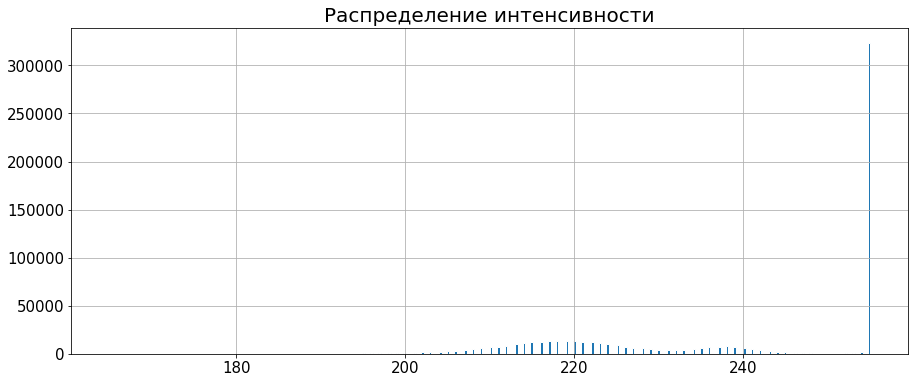

In [3]:
# Проведем распределение интенсивности цвета картинки для последующего поиска границы фильрации пикселей

plt.figure(figsize=(15, 6))

plt.title('Распределение интенсивности', fontsize=20)
plt.hist(np.array(gray).ravel(), bins=300, edgecolor='white')

ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
    
plt.grid(True)
plt.show()

In [4]:
# Используем значение 230 для фильтрации

ret, threshold_image = cv.threshold(gray, 230, 255, 0)

#cv.imshow("До и после", np.hstack([gray, threshold_image]))

#cv.waitKey(0) 
#cv.destroyAllWindows()
#cv.waitKey(1)

cv.imwrite('./images/bubbles_999.png', threshold_image)
image = cv.imread('./images/bubbles_999.png')
output = image.copy()
gray =  cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [ ]:
# ищем круги на изображении

circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1.30, minDist=25, minRadius = 80, maxRadius = 225, 
                          param2 = 97) # 278

#circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1.30, minDist=25, minRadius = 80, maxRadius = 225)  #266


# param1=150, param2 = 20, minRadius = 30, maxRadius = 60

if circles is not None:  # Проверяем,что нашлись хотя бы какие-то круги
    # преобразовываем координаты (x, y) и радиус кругов в целые числа
    # обрабатывает преобразование наших кругов из координат с плавающей точкой (x, y) в целые числа, 
    # это позволит нам рисовать их на нашем выходном изображении.
    
    circles = np.round(circles[0, :]).astype("int") # 

    print('Найдено: ',len(circles), 'кругов')
    for (x, y, r) in circles:  # Пробегаем/итеррируемся по всем координатам и радиусам кругов
        
        
        # рисуем круг на выходном изображении, затем рисуем прямоугольник
        # в соответствии с центром круга
        cv.circle(output, (x, y), round(r/7), (0, 255, 0), 1)
        cv.rectangle(output, (x - 3, y - 3), (x + 3, y + 3), (0, 128, 255), -1)

    #cv.imshow("Результат",  output)  #  # показать выходное изображение
    cv.imshow("До и после", np.hstack([image, output])) #Строим два изображения для сравнения
    
    cv.waitKey(0)
    cv.destroyAllWindows()
    cv.waitKey(1)
    
else: print('Кругов нет')

Найдено:  278 кругов


###### Вывод: Найдено 278 кругов (фактически их 272 (255 целых и 17 частичных))

## Задание № 2. Развешиваем картины

* Выделить все картины на фотографии
* Посчитать площадь картин. 
* Подписать площадь каждой картины на фотографии

In [ ]:
file_image = './data/images/pictures_2.jpg'

image = cv.imread(file_image)  # file_image - имя файла, который будем анализировать
show_my_image(image)

In [1]:
# Ваше решение
import sys
import numpy as np
import cv2 as cv

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_image = './images/pictures_2.jpg'
image = cv.imread(file_image)

#cv.imshow('Pictures', image)
#cv.waitKey(0) 
#cv.destroyAllWindows()
#cv.waitKey(1)

In [5]:
# Baseline решения

hsv_min = np.array((0, 54, 5), np.uint8)
hsv_max = np.array((187, 255, 253), np.uint8)


fn = file_image # имя файла, который будем анализировать
img = cv.imread(fn)

hsv = cv.cvtColor( img, cv.COLOR_BGR2HSV ) # меняем цветовую модель с BGR на HSV
thresh = cv.inRange( hsv, hsv_min, hsv_max ) # применяем цветовой фильтр

contours0, hierarchy = cv.findContours( thresh.copy(), cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)

# перебираем все найденные контуры в цикле
for cnt in contours0:
    rect = cv.minAreaRect(cnt) # пытаемся вписать прямоугольник
    box = cv.boxPoints(rect) # поиск четырех вершин прямоугольника
    box = np.int0(box) # округление координат
    cv.drawContours(img,[box],0,(255,0,0),2) # рисуем прямоугольник

cv.imshow('contours', img) # вывод обработанного кадра в окно

cv.waitKey()
cv.destroyAllWindows()
cv.waitKey(1)

-1

In [4]:
#  настраиваем фильтр 

hsv_min = np.array((0, 0, 0), np.uint8)
hsv_max = np.array((70, 70, 70), np.uint8)

fn = file_image
img = cv.imread(fn)

hsv = cv.cvtColor( img, cv.COLOR_BGR2HSV ) # меняем цветовую модель с BGR на HSV
thresh = cv.inRange( hsv, hsv_min, hsv_max ) # применяем цветовой фильтр

cv.imshow('contours', thresh) # вывод обработанного кадра в окно

cv.waitKey()
cv.destroyAllWindows()
cv.waitKey(1)

-1

In [3]:
# решаем задачу с новым фильтром

hsv_min = np.array((0, 0, 0), np.uint8)
hsv_max = np.array((70, 70, 70), np.uint8)

fn = file_image # имя файла, который будем анализировать
img = cv.imread(fn)

hsv = cv.cvtColor( img, cv.COLOR_BGR2HSV ) # меняем цветовую модель с BGR на HSV
thresh = cv.inRange( hsv, hsv_min, hsv_max ) # применяем цветовой фильтр

contours0, hierarchy = cv.findContours( thresh.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# перебираем все найденные контуры в цикле
for cnt in contours0:
    rect = cv.minAreaRect(cnt) # пытаемся вписать прямоугольник
    box = cv.boxPoints(rect) # поиск четырех вершин прямоугольника
    box = np.int0(box) # округление координат
    area = int(rect[1][0]*rect[1][1]) # вычисление площади
    if area > 2000 and area < 21000:
        print(area, rect[0][0], rect[0][1], rect[1][0], rect[1][1])
        cv.drawContours(img,[box],0,(255,0,0),2)
        cv.putText(img, f"S={area}", (round(rect[0][0]), round(rect[0][1])), \
                                      cv.FONT_HERSHEY_SIMPLEX, 0.4, (0, 255, 0), 1)

cv.imshow('contours', img) # вывод обработанного кадра в окно

cv.waitKey()
cv.destroyAllWindows()
cv.waitKey(1)

6237 549.5 508.5 99.0 63.0
3876 198.5 353.0 68.0 57.0
19803 337.5 316.5 161.0 123.0
14759 198.49996948242188 246.99996948242188 122.99998474121094 119.99998474121094
10370 458.5 226.0 85.0 122.0
5900 196.0 172.0 50.0 118.0
4332 459.5 111.0 76.0 57.0
2880 228.5 100.0 64.0 45.0
2880 169.5 100.0 64.0 45.0


-1

##### Вывод: удалось найти почти все картины. Одну фигуру в расчет не возьмем. Площадь для ненайденной картины можно рассчитать по аналогии с похожей фигурой.

# Дополнительно

* Детальный разбор детекции объектов с помощью цветовой сегментации: 

https://towardsdatascience.com/object-detection-via-color-based-image-segmentation-using-python-e9b7c72f0e11

* Статья по openCV на русском https://tproger.ru/translations/opencv-python-guide/